## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

## Загружаем исходные данные

In [3]:
train = np.loadtxt('./data/digit/train.csv', delimiter=',', skiprows=1)


In [4]:
test = np.loadtxt('./data/digit/test.csv', delimiter=',', skiprows=1)

In [5]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [6]:
print(train_img.shape, test_img.shape)

(42000, 28, 28) (28000, 28, 28)


In [7]:
import pandas as pd

In [8]:
df=pd.DataFrame(data=train[:, 1:], index=train[:, 0])

In [9]:
df=df.sort_index()

In [11]:
#df[9:9].mean()

In [12]:
#a=sorted(train, key=lambda x: x[:][0])
#a[:][0]

In [13]:
#sorted(train[:, 0], key=lambda x: x)

In [14]:
28*28

784

In [15]:
len(train[600][1:])

784

In [16]:
train[600][0]

2.0

In [21]:
a=train[600][1:]
#a

In [22]:
print(len(train_label))
train_label#.dtype

42000


array([1., 0., 1., ..., 7., 6., 9.])

In [23]:
np.resize(a, (28, 28))[5:8,9:12]

array([[  0.,  90., 253.],
       [  0., 131., 118.],
       [  0.,   9.,  20.]])

In [24]:
np.resize(a, (28, 28))[:,7:18]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  13., 191., 191., 122., 121.,  13.,   0.],
       [  0.,   0.,   0.,  18., 193., 253., 253., 254., 253., 242.,  38.],
       [  0.,   0.,   0.,  90., 253., 121.,  97., 160., 249., 253., 189.],
       [  0.,   0.,   0., 131., 118.,  17.,   0.,   0., 128., 253., 253.],
       [  0.,   0.,   0.,   9.,  20.,   0.,   0.,   0.,  23., 197., 253.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  94., 253.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  80., 247.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 214.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  55., 237.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  94., 253.],
       [  0.,   0.,   0.,

NameError: name 'subplot' is not defined

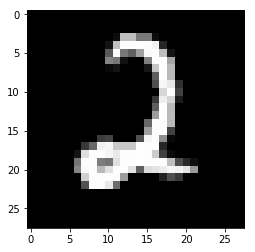

In [25]:
#plt.imshow(img, cmap='gray');
plt.imshow(np.resize(a, (28, 28)), cmap='gray');
subplot.set_title('%s' % train[600][0]);

In [26]:
train_img.shape

(42000, 28, 28)

## Визуализируем исходные данные

ValueError: num must be 1 <= num <= 45, not 46

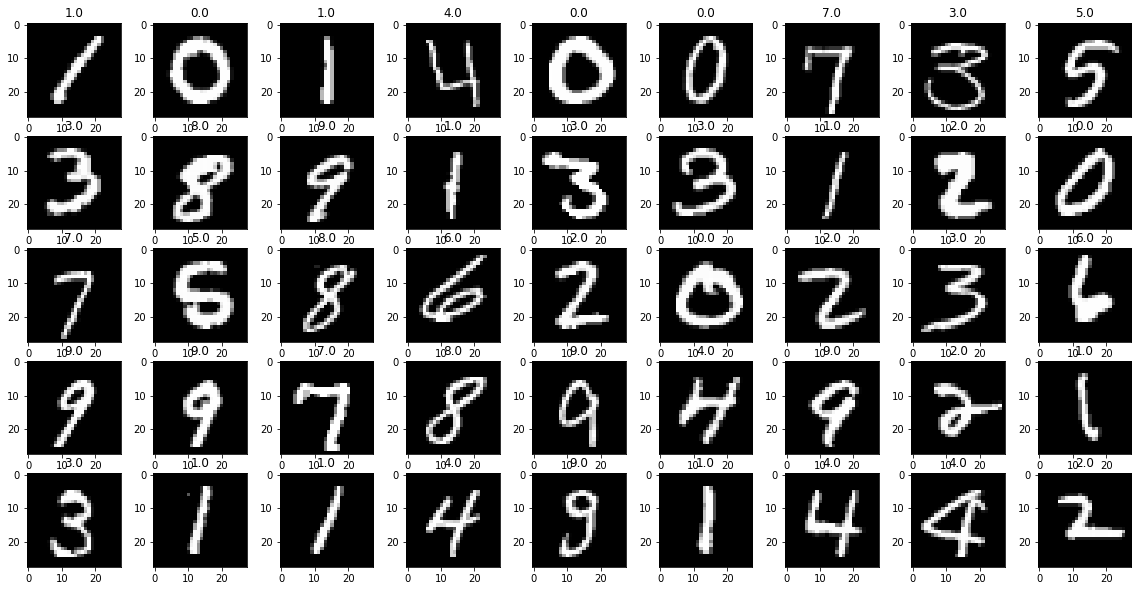

In [27]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:49], 1):
    subplot = fig.add_subplot(5, 9, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);
#img

## Усредним трэйн

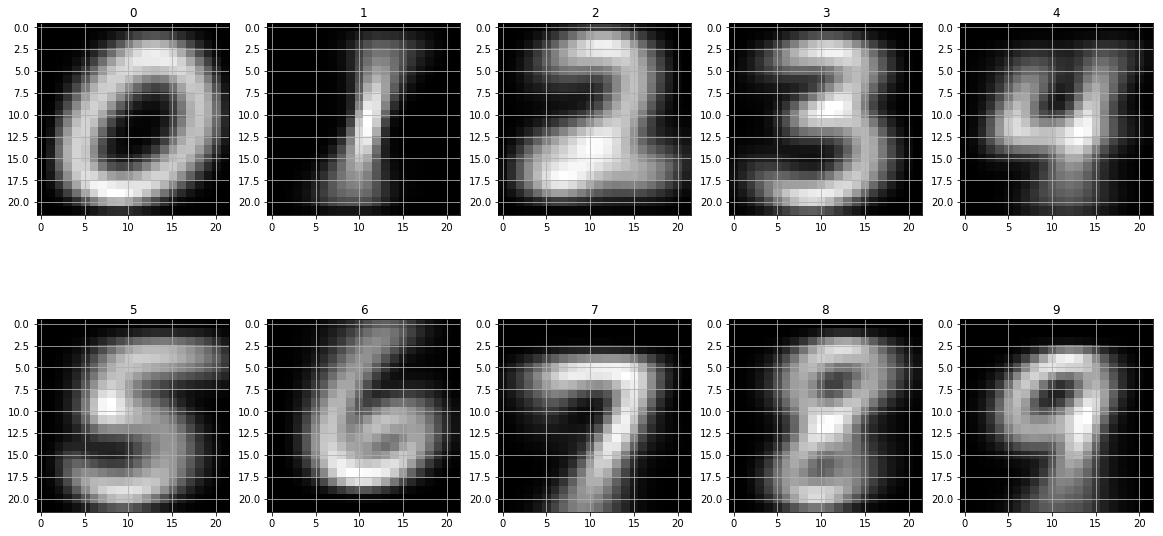

In [28]:
fig = plt.figure(figsize=(20, 10))
for i in range(10):
    subplot = fig.add_subplot(2, 5, i+1)
    img=np.resize(np.array((df[i:i].mean()\
         /max(df[i:i].mean())
         *255).astype('int')), (28,28))
    crop_img = img[3:25, 3:25]
    plt.imshow(crop_img, cmap='gray');
    plt.grid(True)
    subplot.set_title('%s' % i);
#print(max(df[i:i].mean()))
#print(sum(img))
#img

In [34]:
plt.rcParams["figure.figsize"] = (20,10)

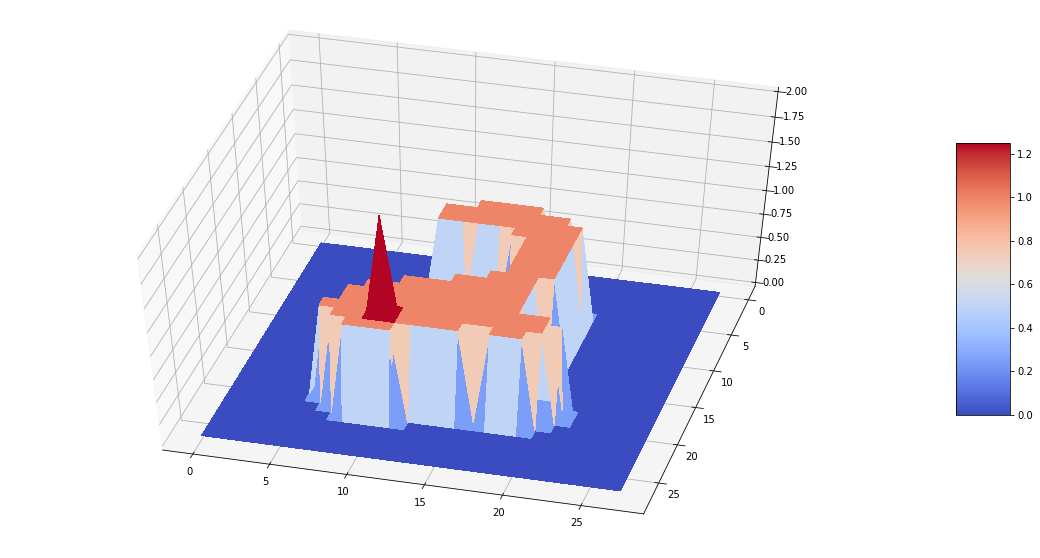

In [40]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

#fig, ax = plt.subplots(figsize=(15.7, 12.27) )

fig = plt.figure()
ax = fig.gca(projection='3d')



img=np.resize(np.array((df[2:2].mean()\
         /max(df[2:2].mean())
         *2).astype('int')), (28,28))

img
#crop_img = img[3:25, 3:25]
#plt.imshow(crop_img, cmap='gray');
#plt.grid(True)
#subplot.set_title('%s' % i);


# Make data.
X = np.arange(0, 28, 1)
Y = np.arange(0, 28, 1)
X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)
#Z = np.sin(R)

Z=img

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
'''
# Customize the z axis.
ax.set_zlim(-1.01, 5)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
'''
fig.colorbar(surf, shrink=0.5, aspect=5)

#plt.show()

#for angle in range(0, 360):
ax.view_init(50, 285)
plt.gca().invert_yaxis()
plt.draw()
#    plt.pause(.001)

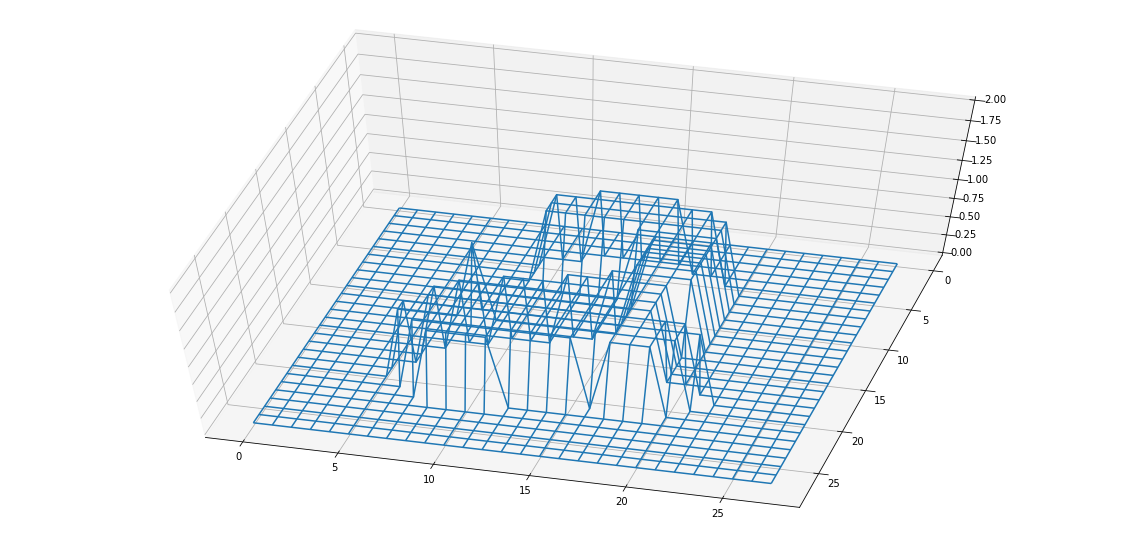

In [43]:
'''
=================
3D wireframe plot
=================

A very basic demonstration of a wireframe plot.
'''

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
#X, Y, Z = axes3d.get_test_data(0.05)
X = np.arange(0, 28, 1)
Y = np.arange(0, 28, 1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
#Z = np.sin(R)

Z=img

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)

ax.view_init(60, 285)
plt.gca().invert_yaxis()

plt.show()


## Вычисляем X и Y составляющие градиента с помощью оператора Собеля

In [45]:
train_sobel_x = np.zeros_like(train_img)
train_sobel_y = np.zeros_like(train_img)
for i in range(len(train_img)):
    train_sobel_x[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    train_sobel_y[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

In [46]:
print(np.resize(a, (28, 28))[5:8,9:12])
print()
print(train_sobel_x[600,6,10])
print()
print(train_sobel_y[600,6,10])
print()
print(253+2*118+20, 18-180+20-253)

[[  0.  90. 253.]
 [  0. 131. 118.]
 [  0.   9.  20.]]

509.0

-395.0

509 -395


In [47]:
test_sobel_x = np.zeros_like(test_img)
test_sobel_y = np.zeros_like(test_img)
for i in range(len(test_img)):
    test_sobel_x[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    test_sobel_y[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

## Вычисляем угол и длину вектора градиента

In [57]:
train_g, train_theta = cv2.cartToPolar(train_sobel_x, train_sobel_y)

In [50]:
#cv2.cartToPolar?

In [58]:
train_g.shape

(42000, 28, 28)

In [52]:
print(train_g[600,6,10])
print(train_theta[600,6,10])
print(np.sqrt(509*509+395*395), 2*np.pi+np.arctan(-509/395))

644.2872030391416
5.623309135437012
644.2872030391416 5.372343121623427


In [ ]:
#почему-то тету не удалось воспроизвести

In [53]:
#np.arсtan?

In [54]:
train_theta.shape

(42000, 28, 28)

In [59]:
test_g, test_theta = cv2.cartToPolar(test_sobel_x, test_sobel_y)

<Figure size 1440x720 with 0 Axes>

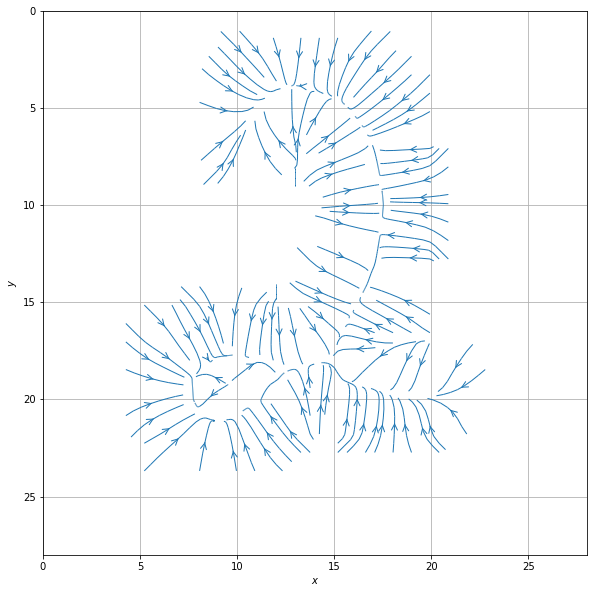

In [60]:
fig = plt.figure(figsize=(20, 10))
#нарисуем векторное поле
import sys
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.patches import Circle

x = np.arange(0, 28, 1)
y = np.arange(27, -1, -1)
X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(111)

ax.streamplot(x, y, train_g[600,Y,X]*np.cos(train_theta[600,Y,X]), train_g[600,Y,X]*np.sin(train_theta[600,Y,X]), \

              linewidth=1, cmap=plt.cm.inferno, \
              density=2, arrowstyle='->', arrowsize=1.5 \
              #,start_points=[X, Y]
              #,start_points=np.meshgrid(x, y)\
             )

plt.grid(True)
#grid(color='r', linestyle='-', linewidth=2)
#Axes.grid(b=True, which='both', axis='both'\
          #, **kwargs\
#         )
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(0,28)
ax.set_ylim(0,28)
ax.set_aspect('equal')
plt.gca().invert_yaxis()
plt.show()

<Figure size 2880x1440 with 0 Axes>

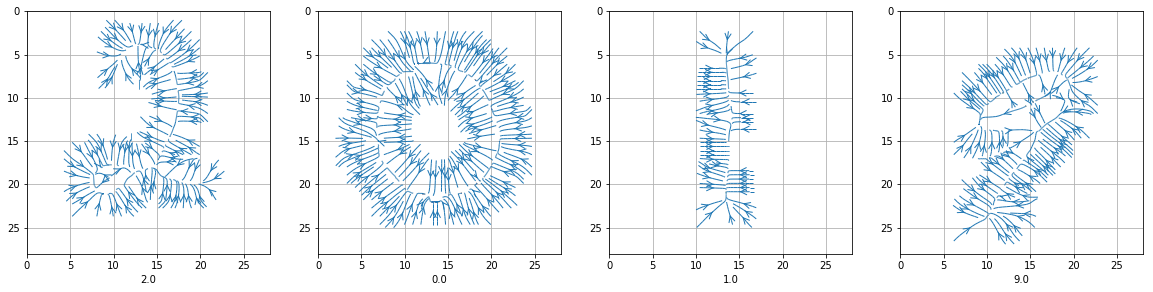

In [61]:
fig = plt.figure(figsize=(40, 20))
#нарисуем векторное поле
import sys
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.patches import Circle

x = np.arange(0, 28, 1)
y = np.arange(27, -1, -1)
X, Y = np.meshgrid(x, y)
fig = plt.figure()
k=1

for i in [600, 1, 2, 11]:
    #subplot = fig.add_subplot(1, 7, i)
    
    ax = fig.add_subplot(1, 4, k)

    ax.streamplot(x, y, train_g[i,Y,X]*np.cos(train_theta[i,Y,X]), train_g[i,Y,X]*np.sin(train_theta[i,Y,X]), \
                  linewidth=1, cmap=plt.cm.inferno, \
                  density=2, arrowstyle='->', arrowsize=1.5 \
                  #,start_points=[X, Y]
                  #,start_points=np.meshgrid(x, y)\
                 )

    k+=1
    plt.grid(True)
    #grid(color='r', linestyle='-', linewidth=2)
    #Axes.grid(b=True, which='both', axis='both'\
          #, **kwargs\
    #         )
    #ax.set_xlabel('$x$')
    ax.set_xlabel(train_label[i])
    #ax.set_ylabel('$y$')
    ax.set_xlim(0,28)
    ax.set_ylim(0,28)
    ax.set_aspect('equal')

    plt.gca().invert_yaxis()
plt.show()

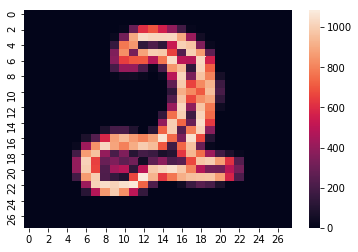

In [40]:
ax = sns.heatmap(train_g[600,27-Y,X])

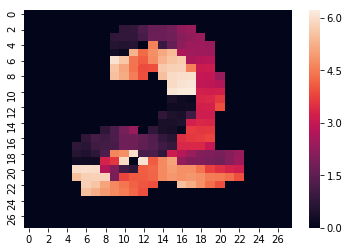

In [41]:
ax = sns.heatmap(train_theta[600,27-Y,X])

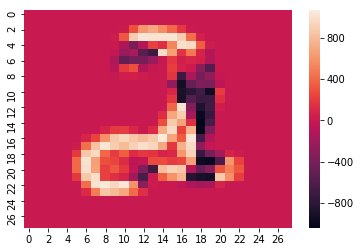

In [42]:
ax = sns.heatmap(train_g[600,27-Y,X]*np.cos(train_theta[600,Y,X]))

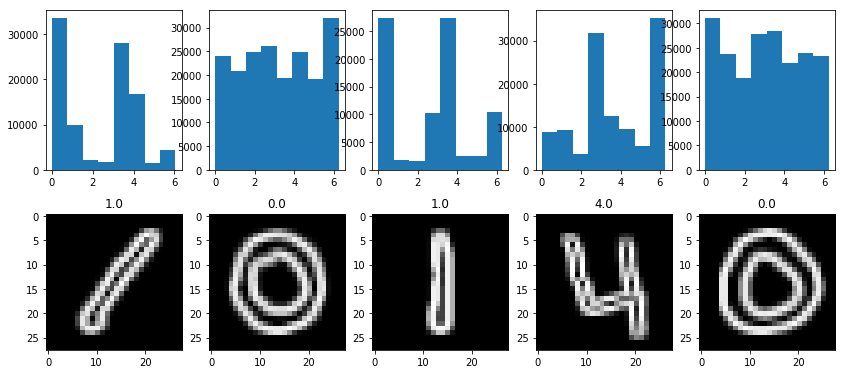

In [62]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_g[:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);
    subplot = fig.add_subplot(3, 7, i)
    plt.hist(train_theta[i - 1].flatten(),
             bins=8, weights=train_g[i - 1].flatten())

## Вычисляем гистограммы градиентов

In [63]:
# Гистограммы вычисляются с учетом длины вектора градиента
train_hist = np.zeros((len(train_img), 8))
for i in range(len(train_img)):
    hist, borders = np.histogram(train_theta[i],
                                 bins=8,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i])
    train_hist[i] = hist

In [64]:
test_hist = np.zeros((len(test_img), 8))
for i in range(len(test_img)):
    hist, borders = np.histogram(test_theta[i],
                                 bins=8,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i])
    test_hist[i] = hist

## Пробую добавить фичи на части изображения

In [132]:
class ColorDescriptor:
    
    def __init__(self, bins):
        # количество сегментов по y, x и channel
        self.bins = bins
 
    def describe(self, image):
        """ Вычисляем дескриптор изображения """
        
        features = []  # результирующий вектор дескриптора
        
        # переводим исходное изображение из цветового пространства BGR в HSV
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
 
        #(h, w) = image.shape[:2]  # размеры изображения
        h=28
        w=28
        #w=28
        (cX, cY) = (int(w * 0.5), int(h * 0.5))  # координаты центра изображения
        
        # делим изображение на равные части
        # и вычисляем координаты сегментов
        n=7
        
        #segments = [(0, 14, 0, 14), 
        #            (14, 28, 0, 14),
        #            (14, 28, 14, 28),
        #            (0, 14, 14, 28)]
 
        segments=[]
        for i in range(n):
            for j in range(n):
                segments.append([int(w/n*j), int(h/n*i), int(w/n*(j+1)), int(h/n*(i+1))])
            
        # готовим маску в виде эллипса для выделения 
        # дескрипторов центральной части изображения
        (axesX, axesY) = (int(w * 0.75) // 2, int(h * 0.75) // 2)
        ellip_mask = np.zeros(image.shape[:2], dtype = np.uint8)
        cv2.ellipse(ellip_mask, (cX, cY), (axesX, axesY), 0, 0, 360, 255, -1)
 
        # итерируем по четырем сегментам и вычисляем дескрипторы
        for (startX, endX, startY, endY) in segments:
            # формируем маску сегмента
            corner_mask = np.zeros(image.shape[:2], dtype = np.uint8)
            cv2.rectangle(corner_mask, (startX, startY), (endX, endY), 255, -1)
            cornerMask = cv2.subtract(corner_mask, ellip_mask)  # вычитаем пересечение с эллипсом 
 
            #
            # строим цветовую гистограмму с учетом маски сегмента
            hist = self.histogram(image, corner_mask, startX, endX, startY, endY)
            features.extend(hist)

        #закомментировал, т.к. еще не освоил эллипсы
        # вычисляем гистограму для центральной области
        #hist = self.histogram(image, ellip_mask, startX, endX, startY, endY)
        #features.extend(hist)
 
        # возвращаем вектор полученный вектор дескрипторов
        return features
    
    def histogram(self, image, mask, startX, endX, startY, endY):
        """ Вычисляет гистограмму в области, заданной маской """
        
        # задаем диапазоны изменений по каналам
        ranges = [0,256]#[0, 180,  # Hue
                  #0, 256,  # Saturation
                  #0, 256]  # Value
        
        #этот блок не отработал
        '''# вычисляем 3D гистограмму (x, y, channel)
        hist = cv2.calcHist([image], \
                            [0],\
                            #[0, 1, 2], \
                            mask,
                            self.bins, ranges = ranges)'''
        #заменяю на этот 
        #startX, endX, startY, endY
        crop_img=image[startX: endX, startY: endY]
        hist, bins = np.histogram(crop_img.ravel(),8,[0,256])
        
        
        # нормируем гистограмму
        #hist = cv2.normalize(hist, np.zeros_like(hist)).flatten()

        return hist

In [71]:
#h=28
#w=28
#(cX, cY) = (int(w * 0.5), int(h * 0.5))  # координаты центра изображения
#n=14
#segments=[]
#for i in range(n):
#    for j in range(n):
#        segments.append([int(w/n*j), int(h/n*i), int(w/n*(j+1)), int(h/n*(i+1))])


In [74]:
#len(segments)
#segments

In [133]:
print(len(train_img), len(test_img))

42000 28000


In [134]:
cd = ColorDescriptor((8, 12, 3))

index_features = []

for i in range(len(train_img)):

    # загружаем изображение
    image = train_img[i]
    
    # вычисляем и сохраняем дескрипторы
    features = cd.describe(image)
    index_features.append(features)

index_features = np.array(index_features)

In [135]:
cd = ColorDescriptor((8, 12, 3))

index_features_te = []

for i in range(len(test_img)):

    # загружаем изображение
    image = test_img[i]
    
    # вычисляем и сохраняем дескрипторы
    features = cd.describe(image)
    index_features_te.append(features)

index_features_te = np.array(index_features_te)

In [116]:
print(index_features.shape)
#index_features

(42000, 648)


## Эксперименты с масками и гистограммами

In [92]:

path='data/mean.png'
img=cv2.imread(path)

#img=train_img[600]

mask = np.zeros(img.shape[:2], np.uint8)
#mask =np.ones(img.shape[:2]).astype('uint8')
mask[50:200, 50:200] = 255
#mask[5:20, 5:20] = 255


masked_img = cv2.bitwise_and(img,img,mask = mask)

hist_full = cv2.calcHist([img],[0],None,[8],[0,256])

hist_mask = cv2.calcHist([img],[0],mask,[8],[0,256])

'''hist = cv2.calcHist(train_img[600], \
                            [0],\
                            mask=mask,\
                            histSize=16, ranges = [0,256])'''

'''hist = cv2.calcHist([img], \
                            [0],\
                            mask=mask,\
                            histSize=16, \
                            #histSize=[0],\
                            ranges = [0,256])'''

#hist,bins = np.histogram(img.ravel(),256,[0,256])

#plt.subplot(111), 
#plt.imshow(img, 'gray')
#plt.show()

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
#plt.xlim([0,256])
 
plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

8 9 9


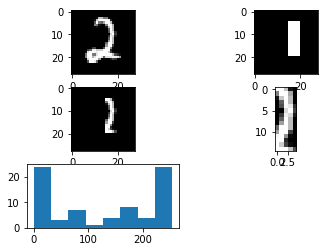

(0.0, 24)
(32.0, 3)
(64.0, 7)
(96.0, 1)
(128.0, 4)
(160.0, 8)
(192.0, 4)
(224.0, 24)
75


In [521]:
img=train_img[600]

mask = np.zeros(img.shape[:2], np.uint8)
#mask =np.ones(img.shape[:2]).astype('uint8')
#mask[50:200, 50:200] = 255
mask[5:20, 15:20] = 255


masked_img = cv2.bitwise_and(img,img,mask = mask)

crop_img = img[5:20, 15:20]


#hist_full = cv2.calcHist([img],[0],None,[8],[0,256])

#hist_mask = cv2.calcHist([img],[0],mask,[8],[0,256])

'''hist = cv2.calcHist(train_img[600], \
                            [0],\
                            mask=mask,\
                            histSize=8, ranges = [0,256])'''

'''hist = cv2.calcHist([img], \
                            [0],\
                            mask,\
                            histSize=[8], \
                            #histSize=[0],\
                            ranges = [0,256]\
                   )'''

hist, bins = np.histogram(crop_img.ravel(),8,[0,256])
weights=bins

print(len(hist), len(bins), len(weights))

#plt.subplot(111), 
#plt.imshow(img, 'gray')
#plt.show()

plt.subplot(321), plt.imshow(img, 'gray')
plt.subplot(322), plt.imshow(mask,'gray')
plt.subplot(323), plt.imshow(masked_img, 'gray')
plt.subplot(324),plt.imshow(crop_img, 'gray')

#plt.subplot(234), plt.plot(hist_full), plt.plot(hist_mask)

#plt.hist(train_theta[i - 1].flatten(),
#             bins=8, weights=train_g[i - 1].flatten())

plt.subplot(325), plt.hist(crop_img.flatten() \
             ,bins=8\
            #, weights=weights[1:9]\
            )

#cv2.waitKey(0)

plt.show()

for i in zip(bins, hist):
    print(i)
print(sum(hist))

In [512]:
print(24+3+7+1+4+8+4+24, 5*15)

75 75


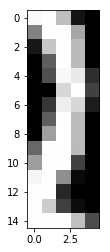

In [476]:
crop_img = img[5:20, 15:20]
plt.imshow(crop_img, 'gray')
#cv2.imshow("cropped", crop_img)
#cv2.waitKey(0)

## Нормируем вектор гистограммы

In [117]:
# По умолчанию используется L2 норма
train_hist = train_hist / np.linalg.norm(train_hist, axis=1)[:, None]

In [118]:
print(train_hist.shape, np.array(index_features).shape, test_hist.shape, np.array(index_features_te).shape, 28/42)

(42000, 1200) (42000, 648) (28000, 1200) (28000, 648) 0.6666666666666666


In [119]:
test_hist = test_hist / np.linalg.norm(test_hist, axis=1)[:, None]

## Добавляю фичи с распределением цвета по углам

In [120]:
train_hist=np.concatenate((train_hist, np.array(index_features)), axis=1)
test_hist=np.concatenate((test_hist, np.array(index_features_te)), axis=1)
print(train_hist.shape, test_hist.shape)

(42000, 1848) (28000, 1848)


## Разбиваем выборку на обучение и валидацию

In [121]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_hist, test_size=0.2,
    random_state=42)

## пробую случ лес

In [122]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_regression

forestcl = RandomForestClassifier(n_estimators=100, max_features=10, max_depth=40)
forestcl.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [123]:
print(forestcl.score(x_train, y_train), forestcl.score(x_val, y_val))

1.0 0.7653571428571428


In [ ]:
'''количество квадратов и точность на тесте
4
9
16 
25 0.8113095238095238
36 0.8197619047619048
49 0.84
64 0.79
81 0.7653571428571428
100
121
144 '''

In [126]:
plt.rcParams["figure.figsize"] = (5,4)

([<matplotlib.axis.XTick at 0x7f0e1b60eeb8>,
 <a list of 5 Text xticklabel objects>)

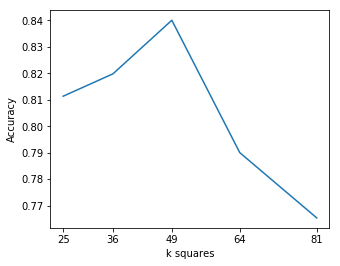

In [131]:
x=[25, 36, 49, 64, 81]
y=[ 0.8113095238095238, 0.8197619047619048, 0.84, 0.79, 0.7653571428571428]
plt.plot(x,y)
plt.xlabel('k squares')
plt.ylabel('Accuracy')
plt.xticks(x)
#ax.set_zlabel('RMSE')

## Вычисляем центроиды каждого из 10 классов

In [598]:
centroids = np.zeros((10, train_hist.shape[1]), dtype=np.float32)

In [599]:
for i in range(10):
    centroids[i] = np.mean(x_train[y_train == i], axis=0)

In [600]:
x_train.shape

(33600, 40)

## Находим ближайший центроид для валидации

In [631]:
pred_val = np.zeros_like(y_val)
for i in range(len(y_val)):
    distances = np.linalg.norm(centroids - x_val[i], axis=1)
    pred_val[i] = np.argmin(distances)

In [632]:
pred_val=forestcl.predict(x_val)

## Оцениваем качество решение на валидационной выборке

In [633]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, pred_val))

Accuracy: 0.7576190476190476


In [634]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75       816
         1.0       0.98      0.97      0.97       909
         2.0       0.73      0.71      0.72       846
         3.0       0.73      0.77      0.75       937
         4.0       0.74      0.68      0.71       839
         5.0       0.64      0.74      0.69       702
         6.0       0.75      0.76      0.75       785
         7.0       0.83      0.79      0.81       893
         8.0       0.70      0.68      0.69       835
         9.0       0.70      0.70      0.70       838

   micro avg       0.76      0.76      0.76      8400
   macro avg       0.76      0.76      0.75      8400
weighted avg       0.76      0.76      0.76      8400



In [604]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

[[449  12  13  30  16 104  27   5 156   4]
 [  0 772   9   0   4   0   1 105  16   2]
 [180  63 290  22 114  18 102  11  33  13]
 [169  57  56 173  54  40  44 133 109 102]
 [ 48  91  56  51 243  42 111 109  41  47]
 [ 79 111  25  64  61 113  55  83  71  40]
 [ 88  54 110   5 188  30 291   1  13   5]
 [ 27 157   9  63  26  59   8 440  74  30]
 [253  50  12  71  32 100  25  34 212  46]
 [ 43  69   5 100  78  63  34 249  63 134]]


[[612   4  22  16  16  32  15   2  91   6]
 [  2 883   1   3  13   0   0   2   0   5]
 [ 20   0 601  49   3  70  47  12  30  14]
 [  1   0  47 726   4 107   1   8  27  16]
 [ 25   9  13   5 571   2  90  34  12  78]
 [  3   0  34 110   1 517   7   5  20   5]
 [ 34   1  55   3  66   6 594   1  14  11]
 [  6   3  23  23  22  29   6 705  10  66]
 [104   1  18  35   6  37  13   4 569  48]
 [ 13   3   9  22  66   6  20  73  40 586]]


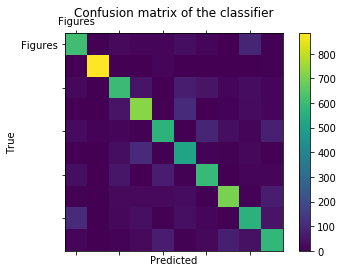

In [635]:
labels = ['Figures']
cm = confusion_matrix(y_val, pred_val)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

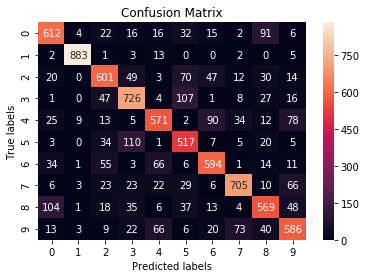

In [636]:
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_val, pred_val), annot=True, fmt="d", xticklabels=True, yticklabels=True )
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

## Предсказания на тестовых данных

In [637]:
pred_test = np.zeros(len(test_img), np.uint8)
for i in range(len(test_img)):
    distances = np.linalg.norm(centroids - test_hist[i], axis=1)
    pred_test[i] = np.argmin(distances)

In [638]:
pred_test=forestcl.predict(test_hist)

## Визуализируем предсказания

NameError: name 'pred_test' is not defined

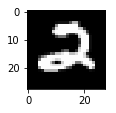

In [22]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:20], 1):
    subplot = fig.add_subplot(2, 12, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

## Готовим файл для отправки

In [644]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        #print('%s,%d\n' % (i, p))
        dst.write('%s,%d\n' % (i, p))

In [620]:
!head submit.txt

'head' is not recognized as an internal or external command,
operable program or batch file.


In [31]:
!ls?

In [ ]:
!ls

In [ ]:
!head